In [379]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
from scipy.signal import stft

### This notebook details the testing process done on the veroboard that combines the JYVA2, HB100 and the ESP32 as a power supply

# Pendulum Test Sampled at 20khz

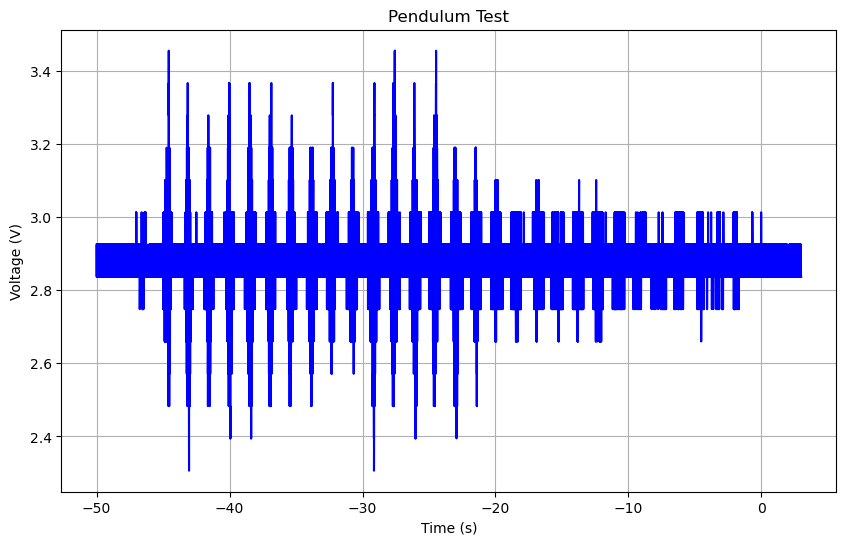

In [380]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('PendulumTest20khz.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array


# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Pendulum Test')
plt.grid(True)


# Show the plot
plt.show()


# Plotting DTFT

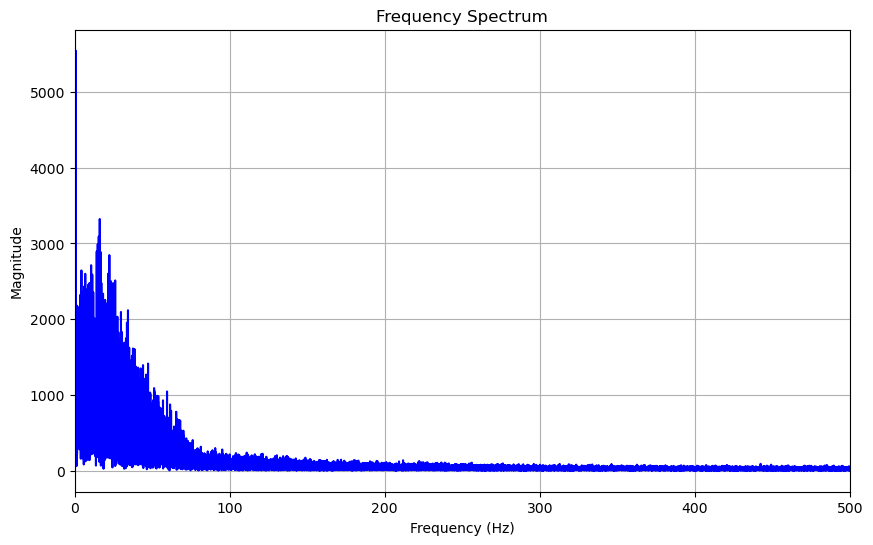

In [381]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 20000

# Perform the FFT
fft_result = np.fft.fft(voltage_data)
fft_freqs = np.fft.fftfreq(len(voltage_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
#plt.ylim(0,4000)
plt.xlim(0,500)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()

# Tash walking towards the radar

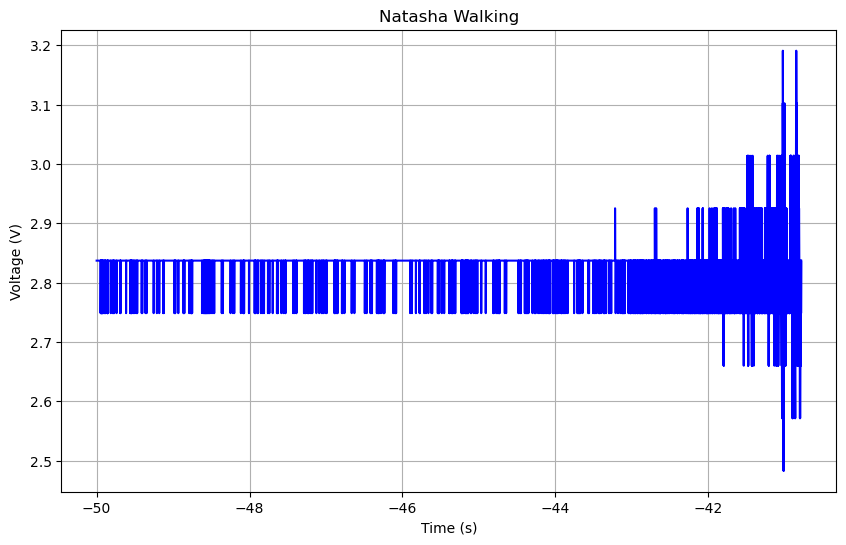

In [382]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('NatashaWalking.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array


# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Natasha Walking')
plt.grid(True)


# Show the plot
plt.show()


# Plotting DTFT

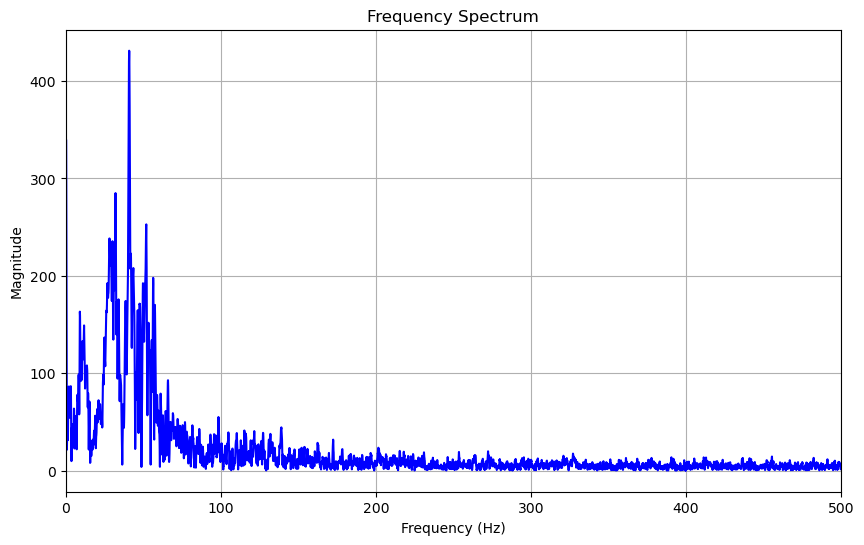

In [383]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 20000

# Perform the FFT
fft_result = np.fft.fft(voltage_data)
fft_freqs = np.fft.fftfreq(len(voltage_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
#plt.ylim(0,4000)
plt.xlim(0,500)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()

# Plotting Spectrogram

/var/folders/g1/gj5y689n0w5fnjjfvlmbhpgr0000gn/T/ipykernel_12801/2563435694.py:17: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Sxx)), shading='auto')


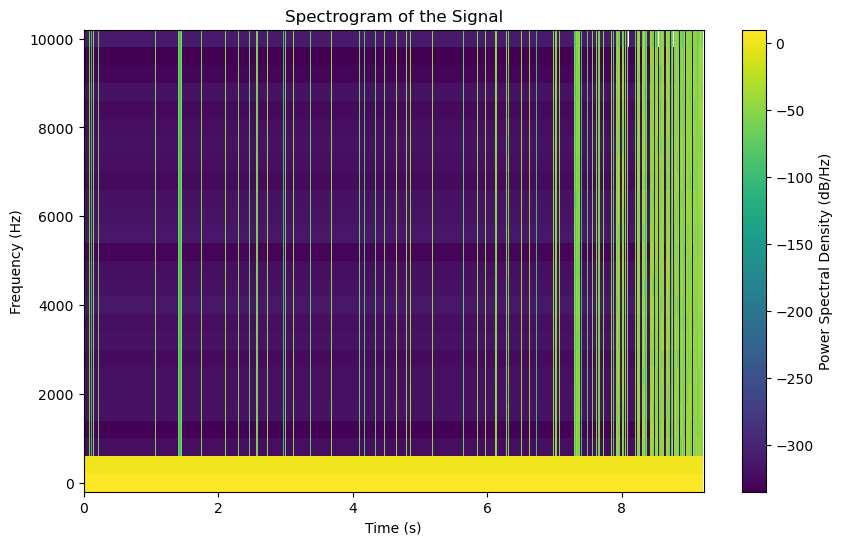

In [384]:
# Define your signal (you can replace this with your actual signal)
# For this example, we'll generate a simple sinusoidal signal.
sample_rate = 20000  # Sample rate in Hz
signal = voltage_data

# Define parameters for the STFT
segment_length = 50  # Number of samples per segment
overlap = 0  # Overlap between segments (adjust as needed)
nperseg = segment_length
noverlap = overlap

# Compute the spectrogram in 50-sample segments
frequencies, times, Sxx = stft(signal, fs=sample_rate, nperseg=nperseg, noverlap=noverlap)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 20 * np.log10(np.abs(Sxx)), shading='auto')
plt.colorbar(label='Power Spectral Density (dB/Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of the Signal')
plt.show()


# Subtracting DC Shift from data

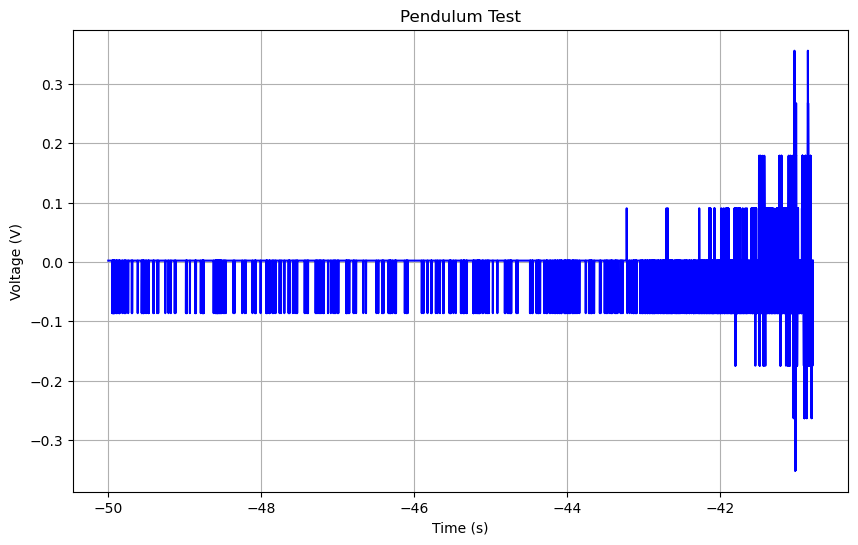

In [385]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('NatashaWalking.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

# Convert voltage_data into a numpy array
voltage_data = np.array(voltage_data)

# Remove DC shift by subtracting the mean value
voltage_data -= np.mean(voltage_data)

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Pendulum Test')
plt.grid(True)

# Show the plot
plt.show()


# Plotting DTFT

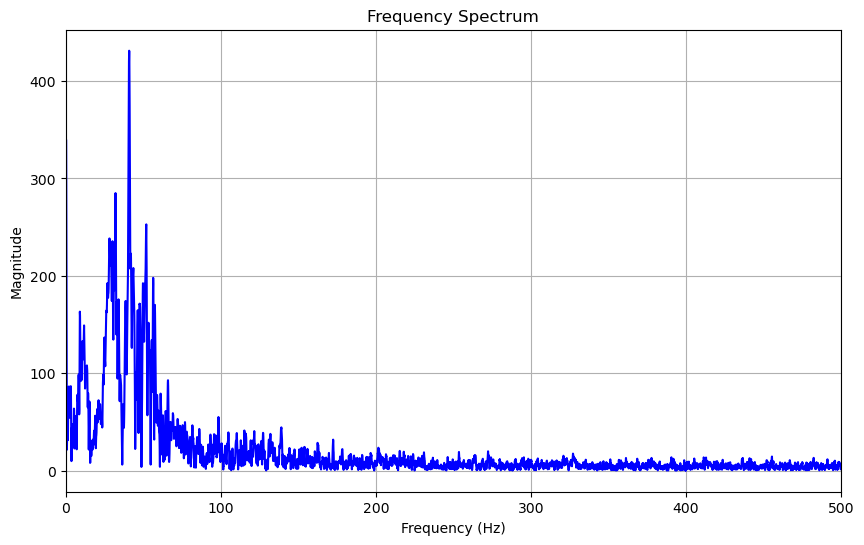

In [386]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 20000

# Perform the FFT
fft_result = np.fft.fft(voltage_data)
fft_freqs = np.fft.fftfreq(len(voltage_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
#fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
#plt.ylim(0,4000)
plt.xlim(0,500)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()

# Plotting Spectrogram

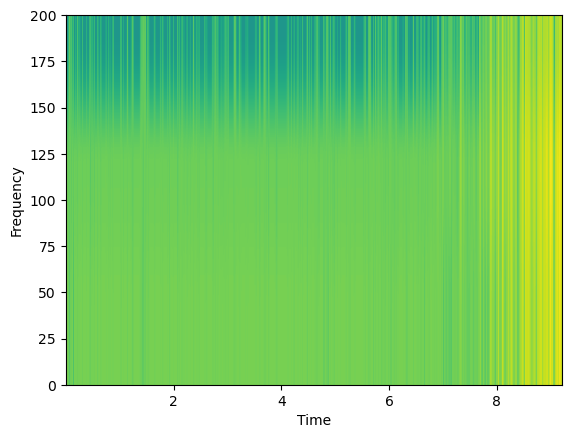

In [387]:
# Sampling Frequency

samplingFrequency   = 20000

# Plot the spectrogram



powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(voltage_data, Fs=samplingFrequency)

plt.ylim(0,200)
plt.xlabel('Time')

plt.ylabel('Frequency')

 

plt.show()   

# Downsampling the data from 20khz to 1khz by averaging extra samples

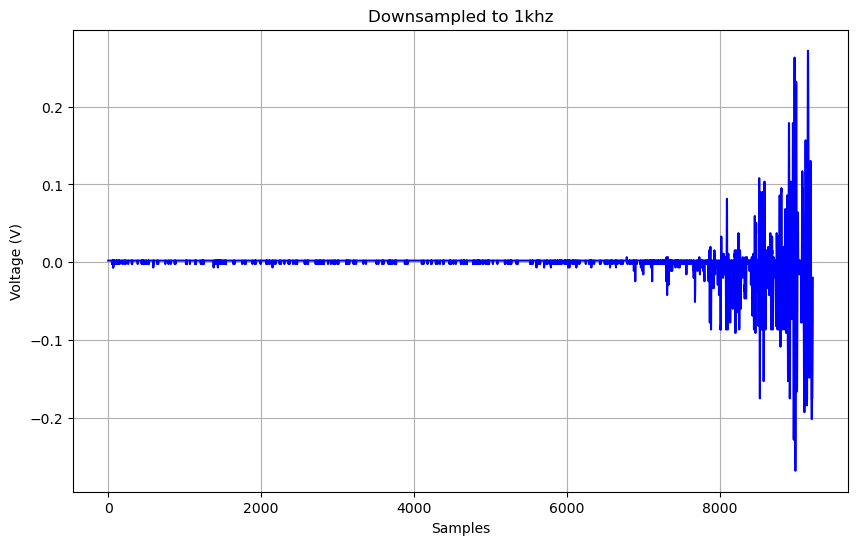

In [388]:
# Original data at 20 ks/s
original_data = voltage_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 20

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])


#downsampled_data = abs(downsampled_data - 2.5)
#downsampled_data = downsampled_data[0:1000]

# Now, downsampled_data contains the downsampled array at 1 ks/s
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(downsampled_data, color='b')
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('Downsampled to 1khz')
plt.grid(True)

# Plotting DTFT

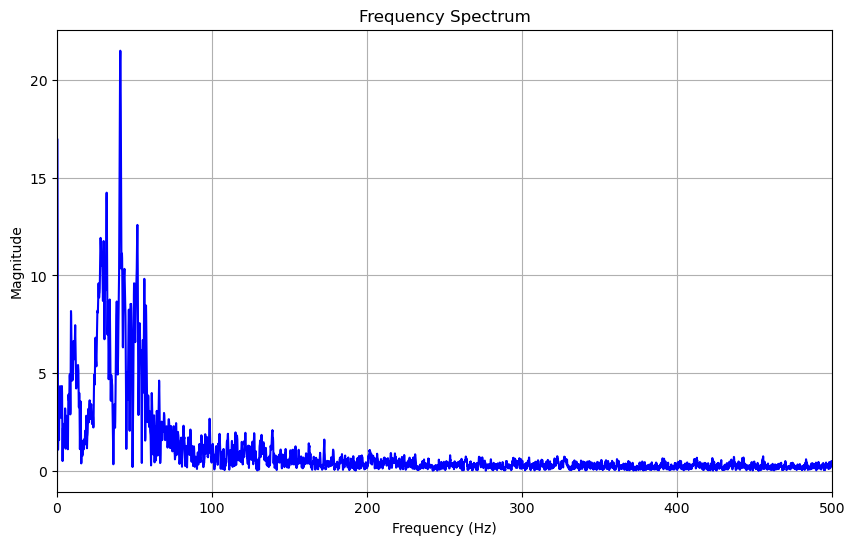

In [389]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 1000

# Perform the FFT
fft_result = np.fft.fft(downsampled_data)
fft_freqs = np.fft.fftfreq(len(downsampled_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
#fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
#plt.ylim(0,4000)
plt.xlim(0,500)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()

# Plotting Spectrogram of this downsampled data

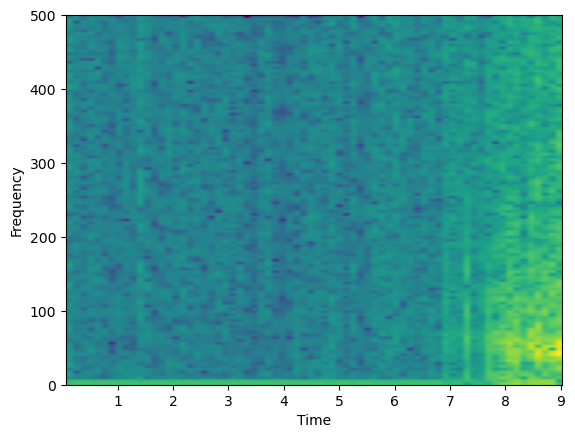

In [390]:
# Sampling Frequency

samplingFrequency   = 1000

# Plot the spectrogram



powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(downsampled_data, Fs=samplingFrequency)

#plt.ylim(0,200)
plt.xlabel('Time')

plt.ylabel('Frequency')

 

plt.show()   

# Daniel plus Tash walking towards radar

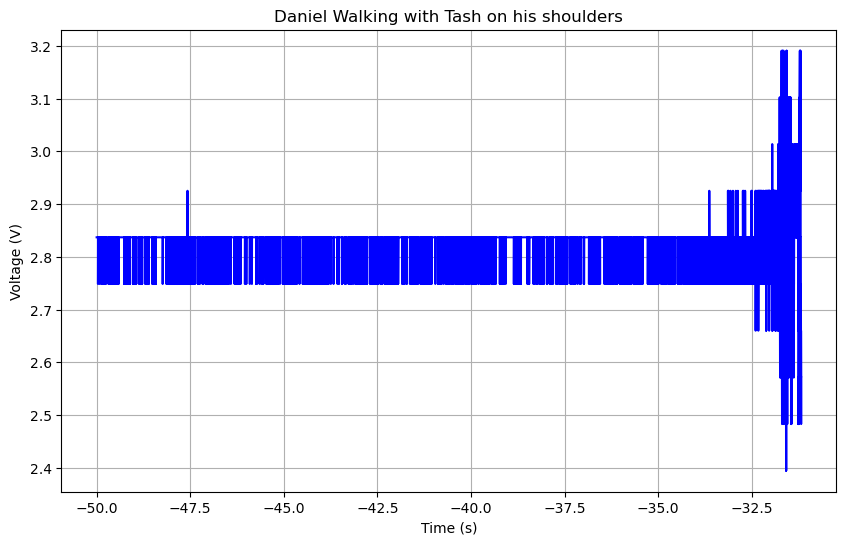

In [391]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('DanielPlusTash.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array


# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Daniel Walking with Tash on his shoulders')
plt.grid(True)


# Show the plot
plt.show()


# Plotting DTFT

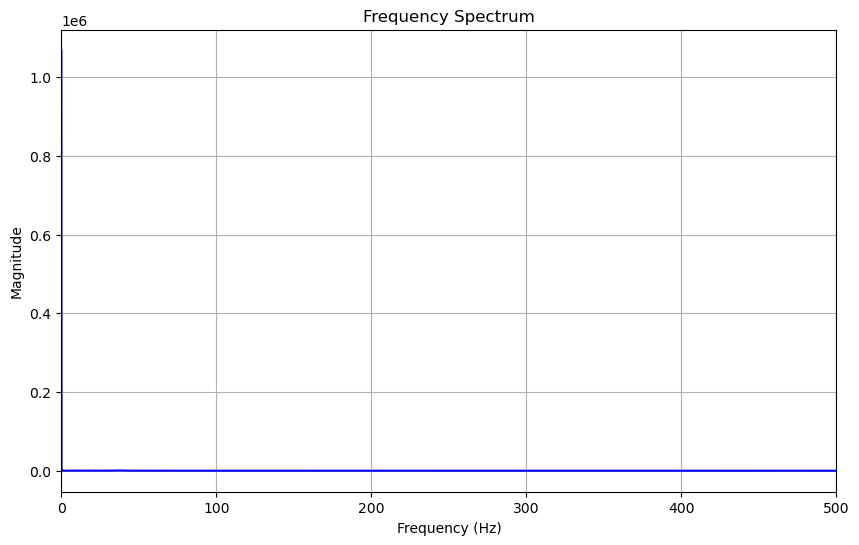

In [392]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 20000

# Perform the FFT
fft_result = np.fft.fft(voltage_data)
fft_freqs = np.fft.fftfreq(len(voltage_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
#fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
#plt.ylim(0,4000)
plt.xlim(0,500)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()

# Removing DC Shift

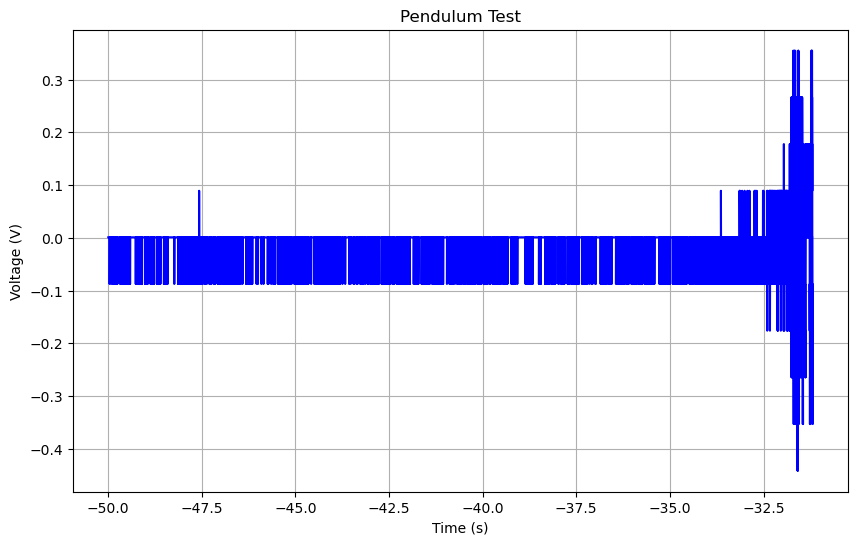

In [393]:
# Convert voltage_data into a numpy array
voltage_data = np.array(voltage_data)

# Remove DC shift by subtracting the mean value
voltage_data -= np.mean(voltage_data)

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Pendulum Test')
plt.grid(True)

# Show the plot
plt.show()


# Now Plotting DTFT

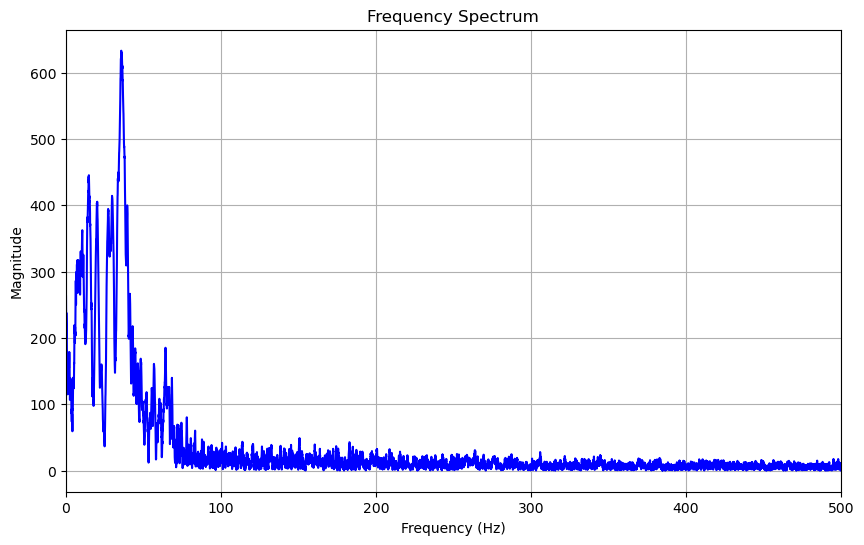

In [394]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 20000

# Perform the FFT
fft_result = np.fft.fft(voltage_data)
fft_freqs = np.fft.fftfreq(len(voltage_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
#fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
#plt.ylim(0,4000)
plt.xlim(0,500)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()

# Downsampling the data from 20khz to 1khz by averaging extra samples

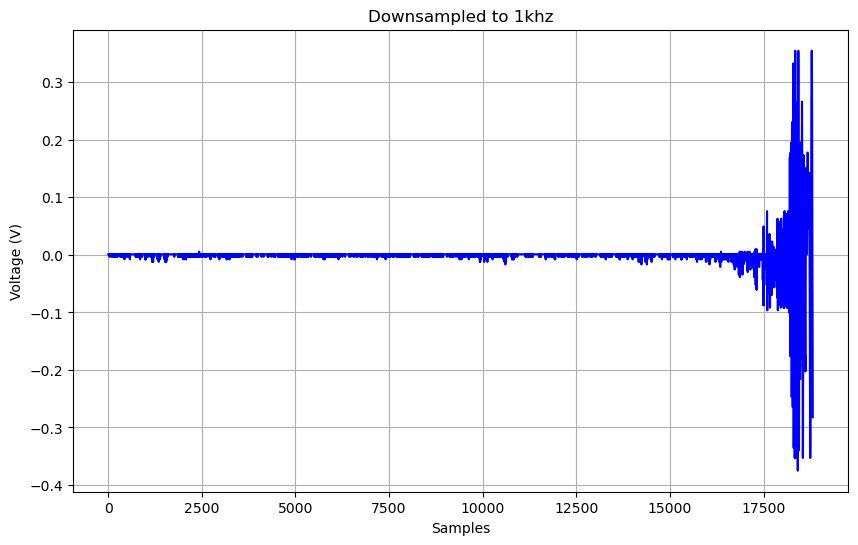

In [395]:
# Original data at 20 ks/s
original_data = voltage_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 20

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])


#downsampled_data = abs(downsampled_data - 2.5)
#downsampled_data = downsampled_data[0:1000]

# Now, downsampled_data contains the downsampled array at 1 ks/s
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(downsampled_data, color='b')
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('Downsampled to 1khz')
plt.grid(True)

# Plotting DTFT

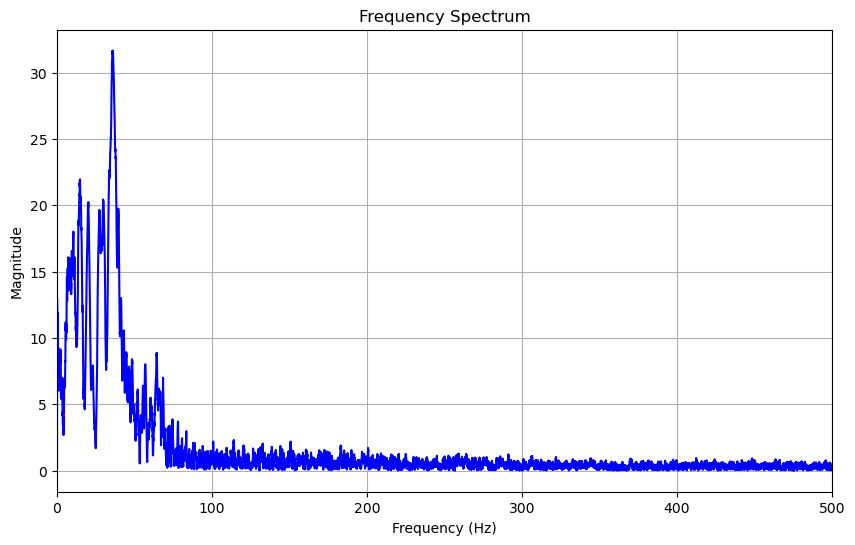

In [396]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 1000

# Perform the FFT
fft_result = np.fft.fft(downsampled_data)
fft_freqs = np.fft.fftfreq(len(downsampled_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
#fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
#plt.ylim(0,4000)
plt.xlim(0,500)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()

# Plotting Spectrogram

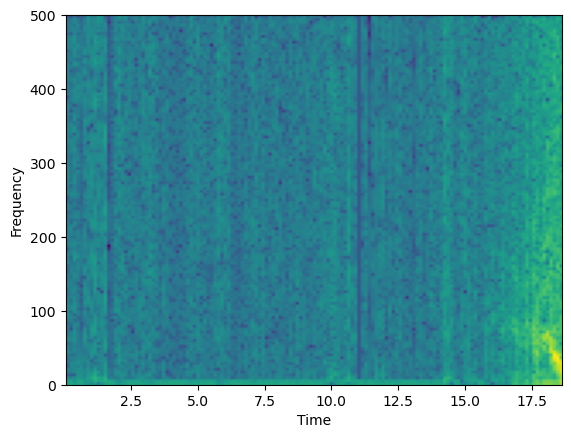

In [397]:
# Sampling Frequency

samplingFrequency   = 1000

# Plot the spectrogram



powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(downsampled_data, Fs=samplingFrequency)

#plt.ylim(0,200)
plt.xlabel('Time')

plt.ylabel('Frequency')

 

plt.show()   

# Mishay Walking towards the radar

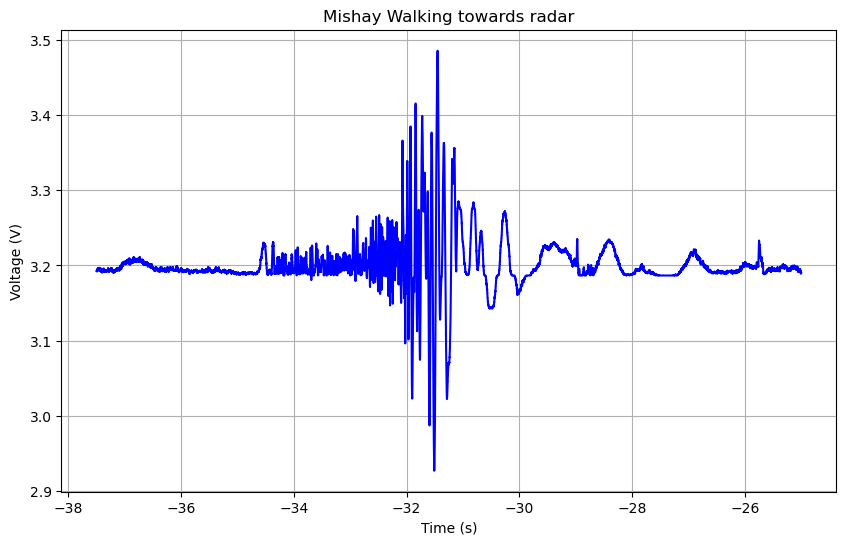

In [398]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('MishayWalking20khz.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array

voltage_data = voltage_data[250000:500000]
time_data = time_data[250000:500000]
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Mishay Walking towards radar')
plt.grid(True)


# Show the plot
plt.show()


# Removing DC Shift

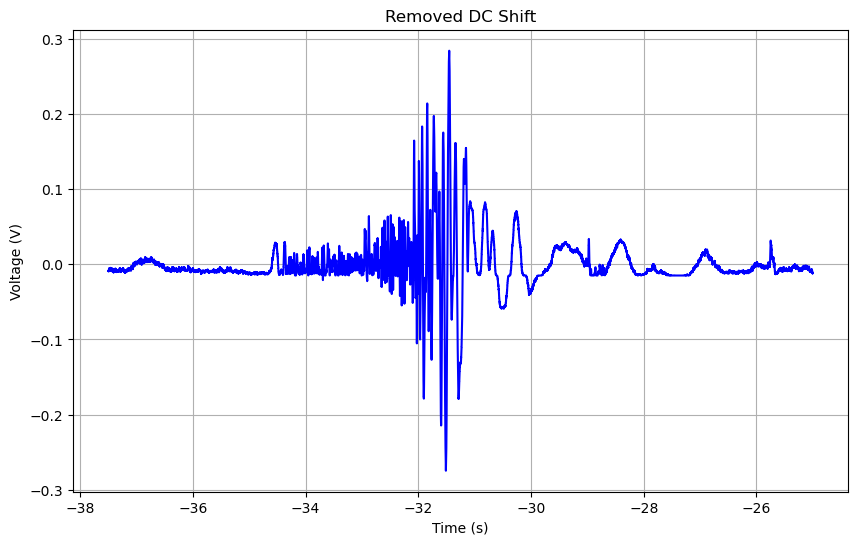

In [399]:
# Convert voltage_data into a numpy array
voltage_data = np.array(voltage_data)

# Remove DC shift by subtracting the mean value
voltage_data -= np.mean(voltage_data)

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Removed DC Shift')
plt.grid(True)

# Show the plot
plt.show()


# Plotting DTFT

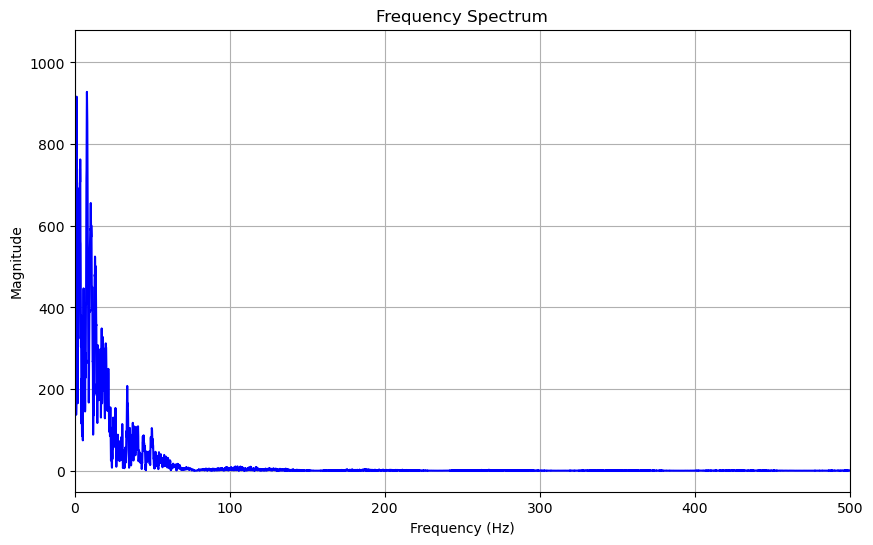

In [400]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 20000

# Perform the FFT
fft_result = np.fft.fft(voltage_data)
fft_freqs = np.fft.fftfreq(len(voltage_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
#fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
#plt.ylim(0,4000)
plt.xlim(0,500)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()

# Plotting Spectrogram

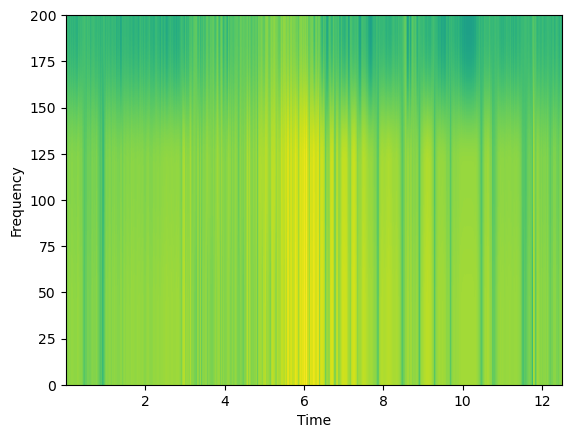

In [401]:
# Sampling Frequency

samplingFrequency   = 20000

# Plot the spectrogram



powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(voltage_data, Fs=samplingFrequency)

plt.ylim(0,200)
plt.xlabel('Time')

plt.ylabel('Frequency')

 

plt.show()   

# Downsampling data to 1khz by averaging all the extra samples

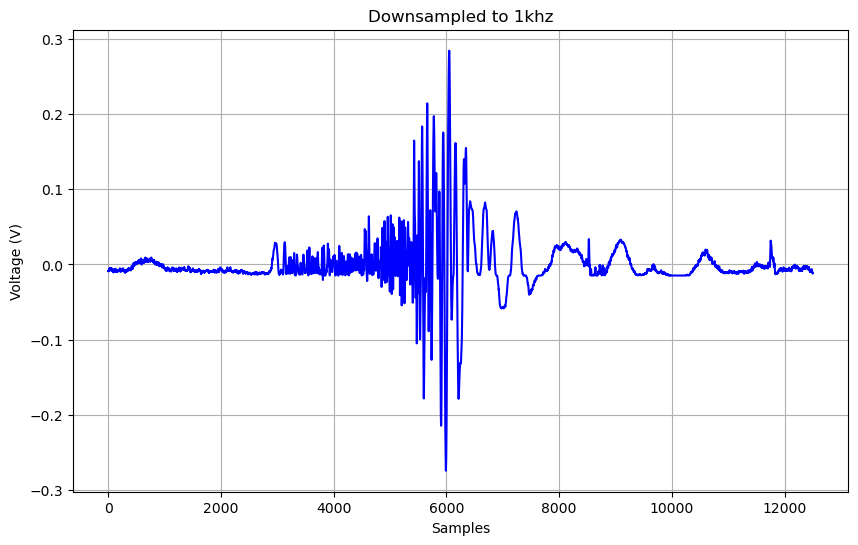

In [402]:
# Original data at 20 ks/s
original_data = voltage_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 20

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])


#downsampled_data = abs(downsampled_data - 2.5)
#downsampled_data = downsampled_data[0:1000]

# Now, downsampled_data contains the downsampled array at 1 ks/s
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(downsampled_data, color='b')
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('Downsampled to 1khz')
plt.grid(True)

# Plotting Spectrogram after downsampling

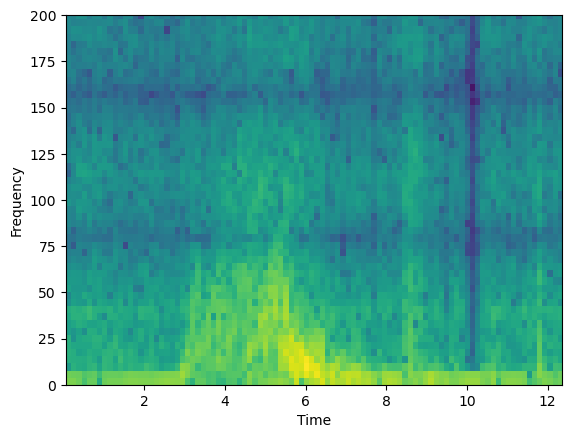

In [403]:
# Sampling Frequency

samplingFrequency   = 1000

# Plot the spectrogram



powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(downsampled_data, Fs=samplingFrequency)

plt.ylim(0,200)
plt.xlabel('Time')

plt.ylabel('Frequency')

 

plt.show()   

# Mishay Walking Towards Radar Higher Amplifier Gain

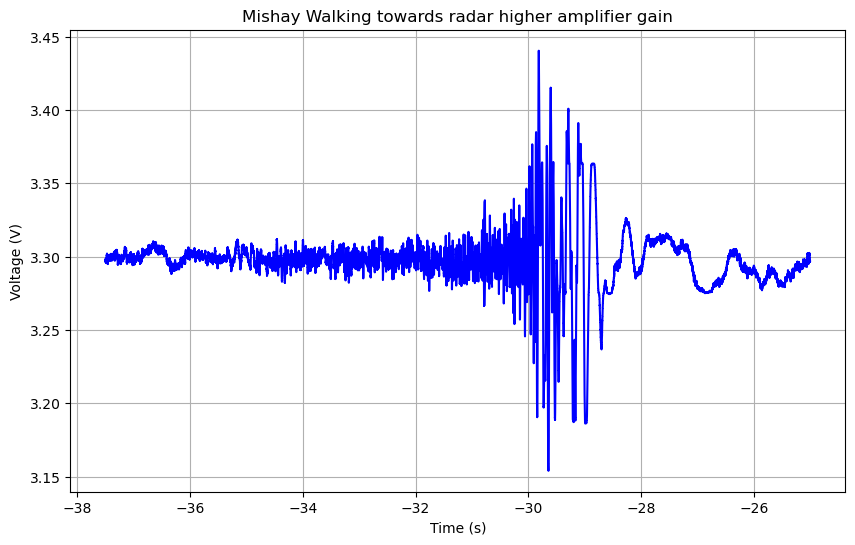

In [404]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('MishayWalkingHigherGain20khz.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array

voltage_data = voltage_data[250000:500000]
time_data = time_data[250000:500000]
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Mishay Walking towards radar higher amplifier gain')
plt.grid(True)


# Show the plot
plt.show()


# Removing DC Shift

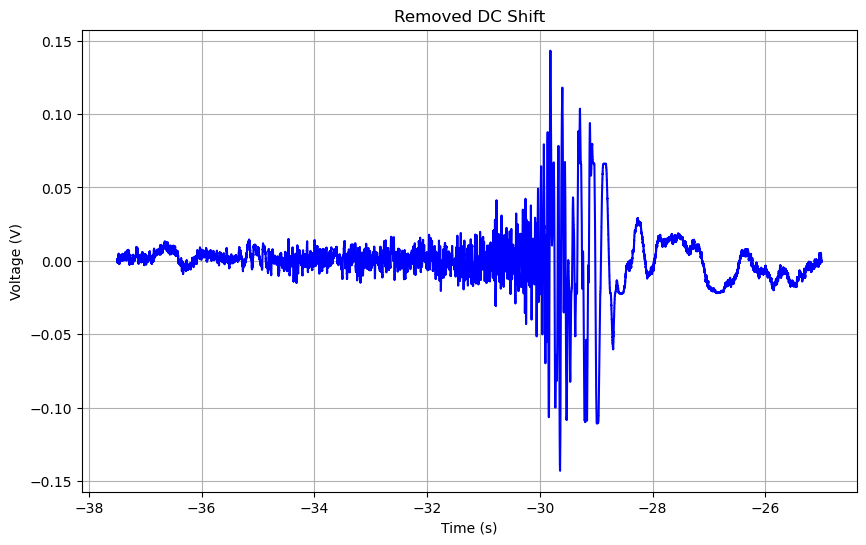

In [405]:
# Convert voltage_data into a numpy array
voltage_data = np.array(voltage_data)

# Remove DC shift by subtracting the mean value
voltage_data -= np.mean(voltage_data)

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Removed DC Shift')
plt.grid(True)

# Show the plot
plt.show()


# Plotting Spectrogram

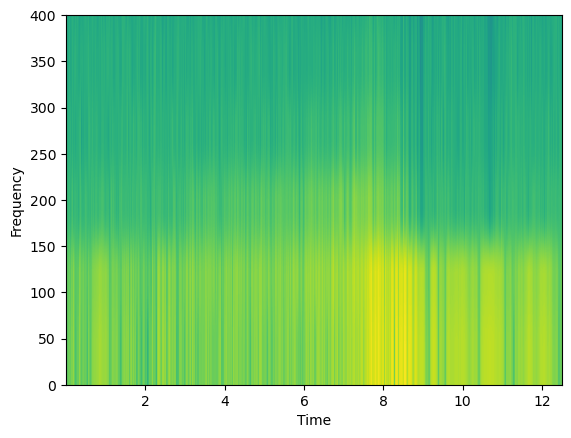

In [406]:
# Sampling Frequency

samplingFrequency   = 20000

# Plot the spectrogram



powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(voltage_data, Fs=samplingFrequency)

plt.ylim(0,400)
plt.xlabel('Time')

plt.ylabel('Frequency')

 

plt.show()   

# Downsampling Data

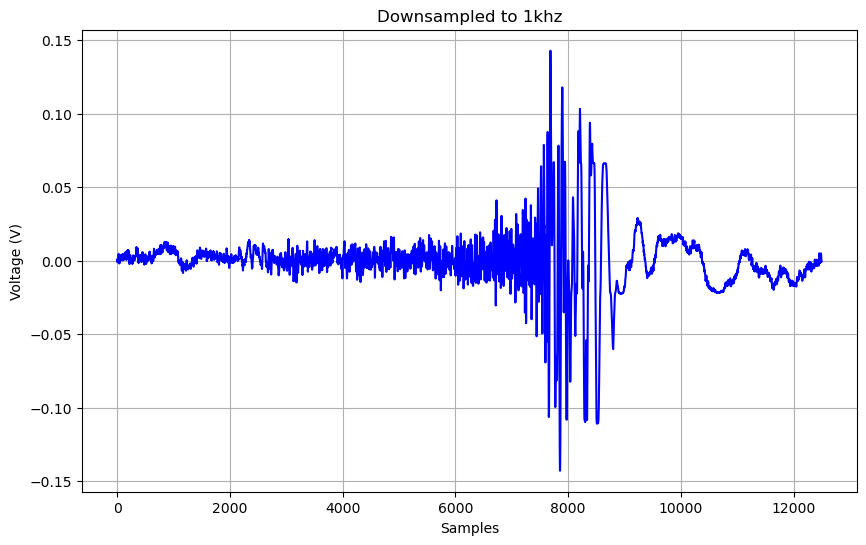

In [407]:
# Original data at 20 ks/s
original_data = voltage_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 20

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])


#downsampled_data = abs(downsampled_data - 2.5)
#downsampled_data = downsampled_data[0:1000]

# Now, downsampled_data contains the downsampled array at 1 ks/s
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(downsampled_data, color='b')
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('Downsampled to 1khz')
plt.grid(True)

# Spectrogram of Downsampled Data

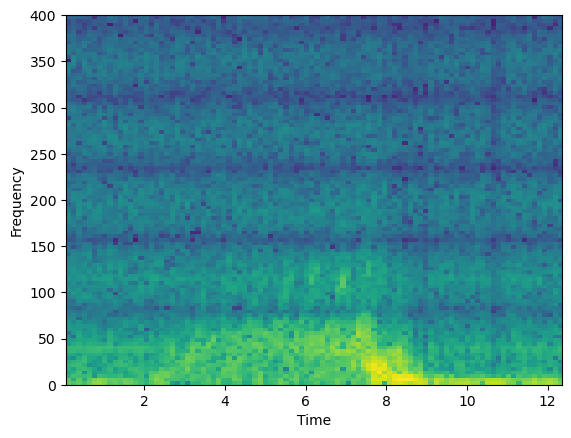

In [408]:
# Sampling Frequency

samplingFrequency   = 1000

# Plot the spectrogram



powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(downsampled_data, Fs=samplingFrequency)

plt.ylim(0,400)
plt.xlabel('Time')

plt.ylabel('Frequency')

 

plt.show()   

# Mishay Walking towards radar with gain increased even more

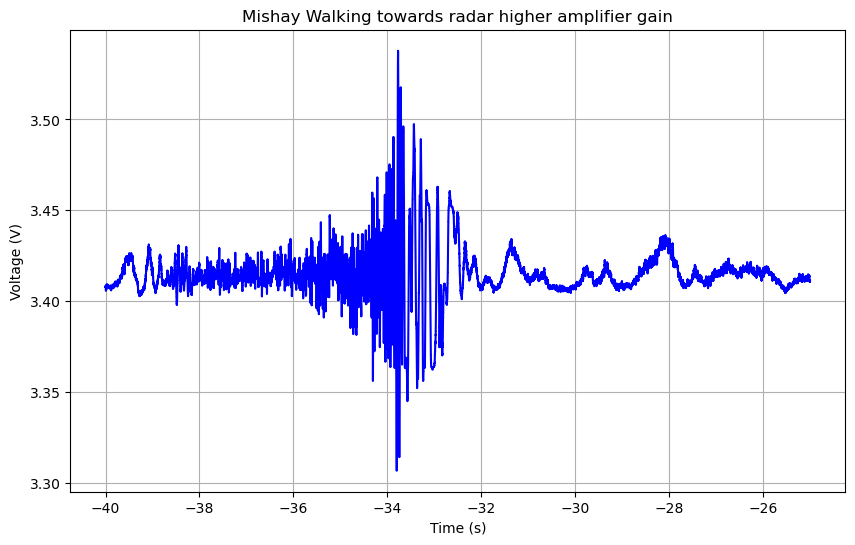

In [409]:
# Initialize empty lists to store time and voltage data
time_data = []
voltage_data = []

# Read data from the text file
with open('MishayWalkingEvenHigherGain20khz.txt', 'r') as file:
    next(file)  # Skip the header line
    next(file)
    for line in file:
        # Split each line into columns using whitespace as the delimiter
        columns = line.strip().split()
        if len(columns) == 2:
            time_data.append(float(columns[0]))
            voltage_data.append(float(columns[1]))

voltage_data = np.array(voltage_data) #converting voltage_data into a numpy array

voltage_data = voltage_data[200000:500000]
time_data = time_data[200000:500000]
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Mishay Walking towards radar higher amplifier gain')
plt.grid(True)


# Show the plot
plt.show()


# Removing DC shift

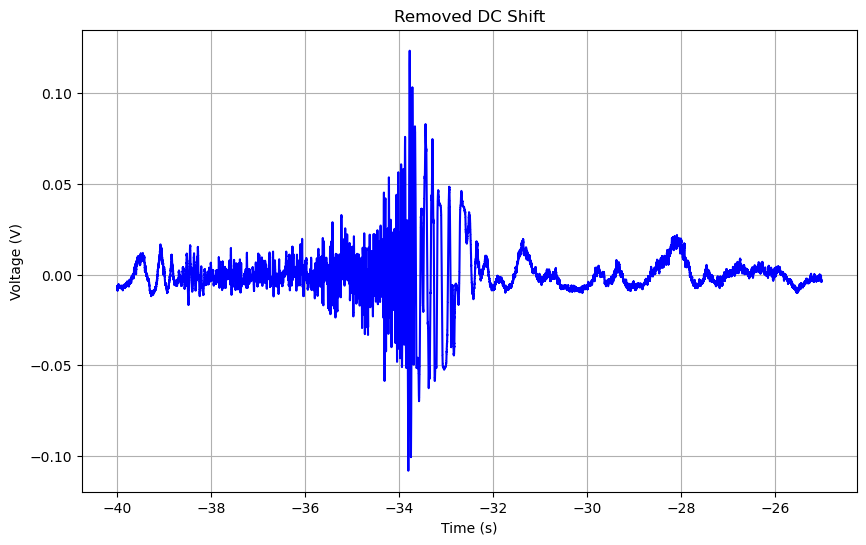

In [410]:
# Convert voltage_data into a numpy array
voltage_data = np.array(voltage_data)

# Remove DC shift by subtracting the mean value
voltage_data -= np.mean(voltage_data)

# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(time_data, voltage_data, color='b')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Removed DC Shift')
plt.grid(True)

# Show the plot
plt.show()


# Downsampling

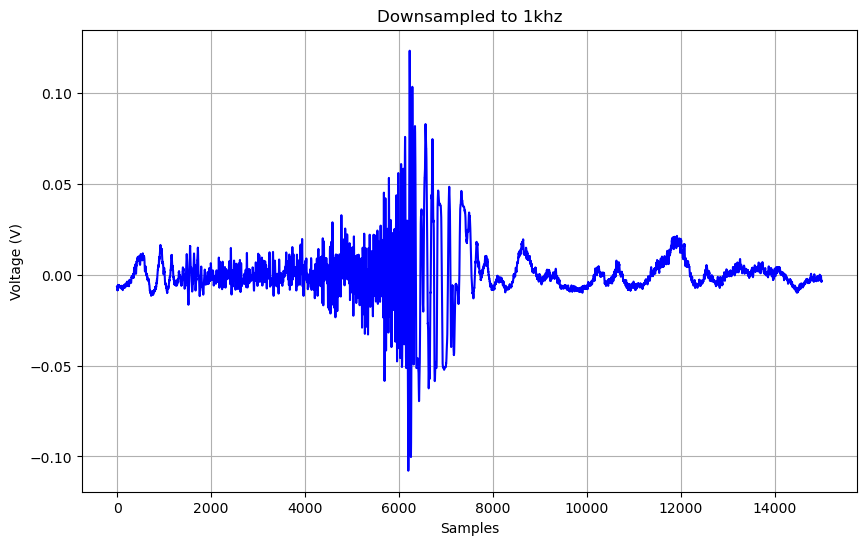

In [411]:
# Original data at 20 ks/s
original_data = voltage_data

# Downsampling factor (20 ks/s to 1 ks/s)
downsampling_factor = 20

# Calculate the length of the downsampled array
downsampled_length = len(original_data) // downsampling_factor

# Create an empty array for the downsampled data
downsampled_data = np.empty(downsampled_length)

# Perform downsampling by averaging
for i in range(downsampled_length):
    start_index = i * downsampling_factor
    end_index = start_index + downsampling_factor
    downsampled_data[i] = np.mean(original_data[start_index:end_index])


#downsampled_data = abs(downsampled_data - 2.5)
#downsampled_data = downsampled_data[0:1000]

# Now, downsampled_data contains the downsampled array at 1 ks/s
# Create the plot
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(downsampled_data, color='b')
plt.xlabel('Samples')
plt.ylabel('Voltage (V)')
plt.title('Downsampled to 1khz')
plt.grid(True)

# Plotting DTFT of this data

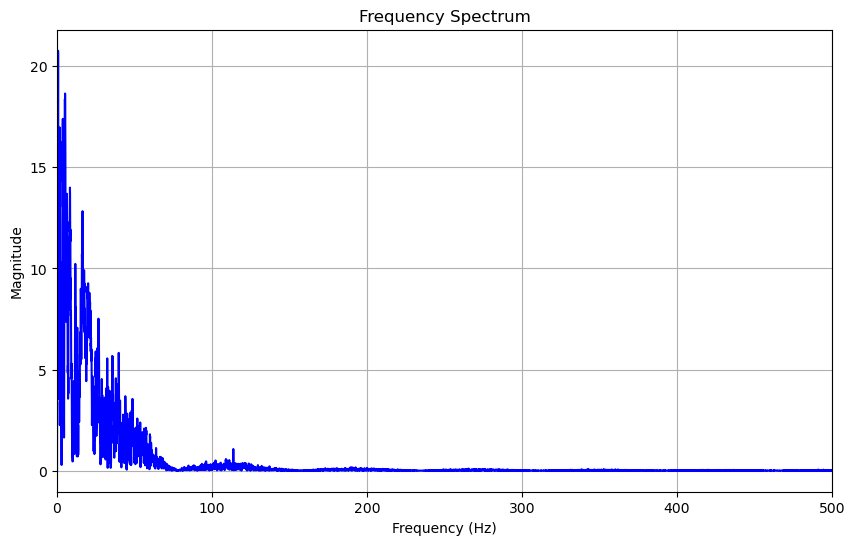

In [412]:
# Sampling frequency (inverse of the time step)
sampling_frequency = 1000

# Perform the FFT
fft_result = np.fft.fft(downsampled_data)
fft_freqs = np.fft.fftfreq(len(downsampled_data), 1 / sampling_frequency)

# Calculate the magnitude of the FFT result
fft_magnitude = np.abs(fft_result)
#fft_magnitude[0] = 0
# Plot the frequency spectrum
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.plot(fft_freqs[:len(fft_freqs) // 2], fft_magnitude[:len(fft_magnitude) // 2], color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
#plt.ylim(0,4000)
plt.xlim(0,500)
plt.title('Frequency Spectrum')
plt.grid(True)

# Show the plot
plt.show()

# Spectrogram

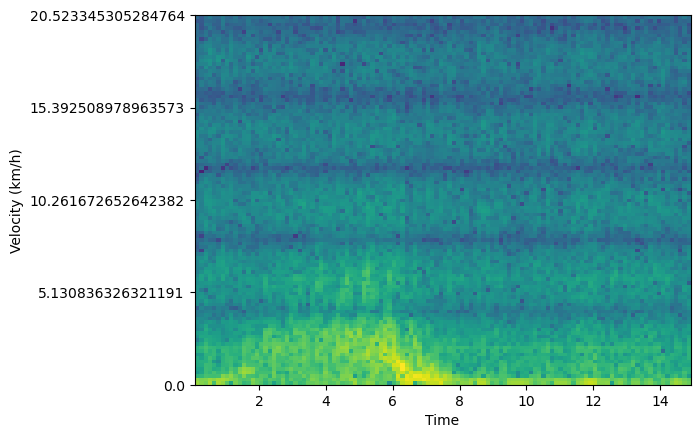

In [413]:
# Sample data
samplingFrequency = 1000

# Plot the spectrogram
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(downsampled_data, Fs=samplingFrequency)

# Adjust the y-axis labels by dividing by 19.49
new_yticks = plt.yticks()[0] / 19.49
plt.yticks(plt.yticks()[0], new_yticks)

plt.ylim(0, 400)
plt.xlabel('Time')
plt.ylabel('Velocity (km/h)')

plt.show()
